In [6]:
#import

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import basinhopping

#parameter

ng = 1.452 #diffractive index of glass
lam = 852e-9 #wave length[m]
R = 75e-3 #curvature radius[m]
L = 5e-3 #length of cavity[m]
f = np.array([30,40,50,75,100,150,200])*1e-3 #focus length[m]

# double path

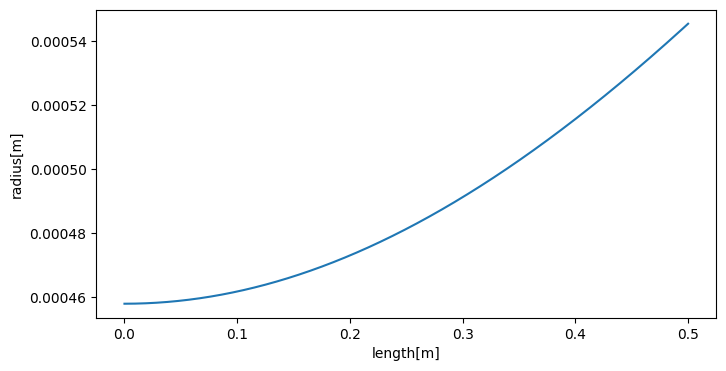

In [7]:
lam = 852.3e-9

#任意の位置:zにおけるビーム径を
def waist(z, z0, w0):
    z_R = np.pi*1*w0**2/lam #Rayleigh length
    return w0*np.sqrt(1 + ((z-z0)/z_R)**2)

z = np.linspace(0, 500e-3, 9001)
Omega_result = 4.58e-4

plt.figure(figsize=(8,4))
plt.plot(z, waist(z, 0, Omega_result))
plt.xlabel("length[m]")
plt.ylabel("radius[m]")
plt.show()

In [10]:
#one lens version  

def matrixCal(d,f):
    d1 = d[0]
    d2 = d[1]
    Mf = np.array([[1,0],[-1/f,1]])
    Md1 = np.array([[1,d1],[0,1]])
    Md2 = np.array([[1,d2],[0,1]])

    M=np.matmul(Mf,Md1) 
    M=np.matmul(Md2,M) 
    M=np.matmul(Mf,M)
    M=np.matmul(Md1,M)

    A=M[0][0]
    B=M[0][1]
    C=M[1][0]
    D=M[1][1]

    q_in = 1j*np.pi*1*Omega_result**2/lam
    q_out = (A*q_in+B)/(C*q_in+D)
    q_out_inverse = 1/q_out
    Omega_dash = np.sqrt(- lam/(np.pi*1*q_out_inverse.imag))
    Omega_waist = np.sqrt(q_out.imag*lam/np.pi*1)
    CurvatureRadius_dash = 1/q_out.real
    return Omega_waist, Omega_dash, CurvatureRadius_dash

In [9]:
for i in f:
    print(i,"[m]")
    print(matrixCal([100e-3,200e-3],i))

0.03 [m]
(3.7951472725169517e-06, 0.004544083292995941, 15.731417253750688)
0.04 [m]
(7.883630932515772e-06, 0.0016054605946976511, 21.434922449301084)
0.05 [m]
(1.4800972386465223e-05, 0.0004580000000000001, 40.041818006727844)
0.075 [m]
(6.621652164502456e-05, 0.0003571937303157072, -11.67255908297154)
0.1 [m]
(0.000458, 0.00045799999999999997, -inf)
0.15 [m]
(0.00012999043299383555, 0.00036009252851536175, 6.214928498801528)
0.2 [m]
(0.00011749108427658056, 0.0002456333062248193, 10.704437936065386)


C:\Users\502646\AppData\Local\Temp\ipykernel_25004\340400039.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  CurvatureRadius_dash = 1/q_out.real


# phase lock path

rayleigh length: 0.02187222795710489 [m]
waist position: -0.0922261586691427 [m]
beam waist: 7.703140508630809e-05 [m]


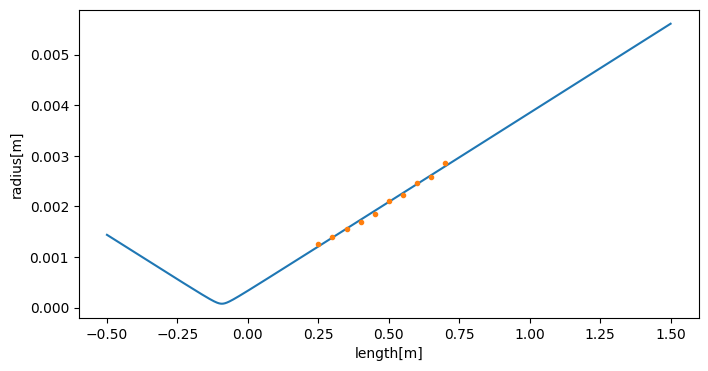

In [11]:
# beam waist size and position
zs = np.array([10,12,14,16,18,20,22,24,26,28])*25*1e-3 #[m]
ws = np.array([1251,1402,1559,1695,1848,2110,2232,2470,2579,2847])*1e-6 #[m]

def waist(z, z0, w0):
    z_R = np.pi*1*w0**2/lam #Rayleigh length
    return w0*np.sqrt(1 + ((z-z0)/z_R)**2)

popt, pcov = curve_fit(waist, zs, ws)
waist_position, Omega0 = popt
print("rayleigh length:",np.pi*1*popt[1]**2/lam,"[m]")
print("waist position:",waist_position,"[m]")
print("beam waist:",Omega0,"[m]")

z = np.linspace(-500e-3, 1500e-3, 2001) #plot range
plt.figure(figsize=(8,4))
plt.plot(z, waist(z, *popt))
plt.plot(zs, ws, '.')
plt.xlabel("length[m]")
plt.ylabel("radius[m]")
plt.show()

beam parameter after 1st lens

In [14]:
def matrixCal_check(d,f):
    Mf = np.array([[1,0],[-1/f,1]])
    Md = np.array([[1,d],[0,1]])

    M=np.matmul(Mf,Md) 

    A=M[0][0]
    B=M[0][1]
    C=M[1][0]
    D=M[1][1]

    q_in = 1j*np.pi*1*Omega0**2/lam
    q_out = (A*q_in+B)/(C*q_in+D)
    q_out_inverse = 1/q_out
    Omega_waist = np.sqrt(q_out.imag*lam/np.pi*1)
    Rayleigh_length = np.pi*1*Omega_waist**2/lam
    Omega_dash = np.sqrt(- lam/(np.pi*1*q_out_inverse.imag))
    CurvatureRadius_dash = 1/(q_out.real)
    return Omega_waist, Rayleigh_length, Omega_dash, CurvatureRadius_dash

In [15]:
print(matrixCal_check(269e-3-waist_position,100))

(7.731066959236441e-05, 0.022031103650611488, 0.0012745258824464242, 2.758385588403223)


phase lock path coupling

In [16]:
def matrixCal_check(d,f):
    d1 = d[0]
    d2 = d[1]
    Mf = np.array([[1,0],[-1/f,1]])
    Md1 = np.array([[1,d1],[0,1]])
    Md2 = np.array([[1,d2],[0,1]])

    M=np.matmul(Mf,Md1) 
    M=np.matmul(Md2,M) 
    M=np.matmul(Mf,M)
    M=np.matmul(Md1,M)

    A=M[0][0]
    B=M[0][1]
    C=M[1][0]
    D=M[1][1]

    q_in = 1j*np.pi*1*Omega0**2/lam
    q_out = (A*q_in+B)/(C*q_in+D)
    q_out_inverse = 1/q_out
    Omega_waist = np.sqrt(q_out.imag*lam/np.pi*1)
    Rayleigh_length = np.pi*1*Omega_waist**2/lam
    Omega_dash = np.sqrt(- lam/(np.pi*1*q_out_inverse.imag))
    CurvatureRadius_dash = 1/(q_out.real)
    return  Omega_waist, Rayleigh_length, Omega_dash, CurvatureRadius_dash

In [17]:
print(matrixCal_check([269e-3-waist_position,200e-3],100))

(7.77480243531971e-05, 0.022281073347887936, 0.0032353978914334246, 1.0788249605425606)
